# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Regression/Position_Salaries.csv

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In this notebook we only use one feature, which is `Level`, so we don't need to preprocess the data

## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

### Preprocessing the data

We have to turn the X vector into Polinomial X vector.

We'll use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

We will transform to this polynomial linear regression equation:
$$\textrm{y} = b_{0} + b_{1}\times{x_{1}} + b_{2}\times{x_{1}}^{2}$$

We will compose a new matrix `X` of a single feature into new matrix of features composed of $x_{1}$ (position level) as the first feature and $x_{1}^{2}$ (squares of position level) as the second feature.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
from sklearn.linear_model import LinearRegression

poly_linear_regressor = LinearRegression()
poly_linear_regressor.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

In [ ]:
linear_pred = linear_regressor.predict(X)

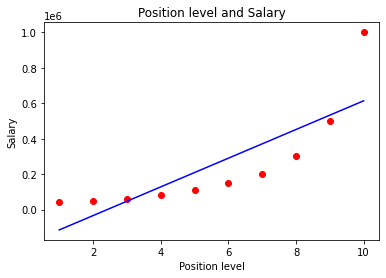

In [ ]:
plt.scatter(X, y, color="r", label="Train data")
plt.plot(X,linear_pred, color="b", label="Linear regression")
plt.title("Position level and Salary")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

In [ ]:
poly_linear_pred = poly_linear_regressor.predict(X_poly)

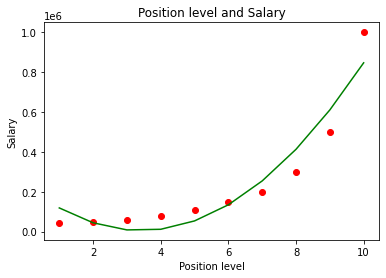

In [ ]:
plt.scatter(X, y, color="r", label="Train data")
plt.plot(X, poly_linear_pred, color="g", label="Poly linear regression")
plt.title("Position level and Salary")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

We'll increase the degree of our `PolynomialFeatures` from `2` to `3`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=3)# we change the degree here
X_poly = poly_reg.fit_transform(X)
poly_linear_regressor = LinearRegression()
poly_linear_regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [ ]:
poly_linear_pred = poly_linear_regressor.predict(X_poly)

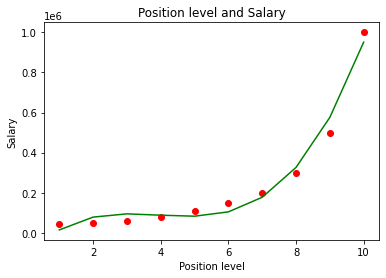

In [ ]:
plt.scatter(X, y, color="r", label="Train data")
plt.plot(X, poly_linear_pred, color="g", label="Poly linear regression")
plt.title("Position level and Salary")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

This is the regression if we change the degree from `2` to `4`
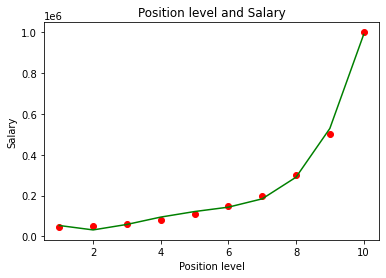


## Predicting a new result with Linear Regression

In [ ]:
linear_regressor.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [ ]:
poly_linear_regressor.predict(poly_reg.fit_transform([[6.5]]))

array([133259.46969697])

In [ ]:
[[6.5]*4]

[[6.5, 6.5, 6.5, 6.5]]

In [ ]:
poly_reg.fit_transform([[6.5]])

array([[  1.   ,   6.5  ,  42.25 , 274.625]])